In [1]:
#Sentiment analysis program which parses the tweets fetched from twitter

In [2]:
#Importing the required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [3]:
#Twitter API credentials
consumerKey = '8ddimg5q45n5F6rcTqzbHmlIC'
consumerSecret = 'YFdaoqkYVCfXFxTamjjm65i8iMJQCAHny292f2KuyuVJkdZjhK'
accessToken = '733600900246212608-4UyFsDLvxfAfOlMDNpzE3XEhny7mqNZ'
accessTokenSecret = 'kJk40m7xS401bNKUPQuA9SKCXnxtvVvFbZjM8MttBsOik'

In [4]:
#Creating the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#setting the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Createing the API  object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
#Extracting 10000 tweets from the twitter user data
posts = api.user_timeline(screen_name = "RGVzoomin", count = 10000, lang = "en", tweet_mode = "extended")

#printing the last 20 tweets 
print("showing 20 recent tweets: \n")
i=1
for tweet in posts[0:20]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i = i+1

showing 20 recent tweets: 

1)Yes please listen to him please! https://t.co/Qnb4TjrlpR

2)POWER STAR Saab https://t.co/xcnCW1gic8

3)Hey #HappyBirthdayManisharma Here is the first song ever Mani Sharma did in his career and also the first song I ever shot with Urmila 
https://t.co/2fLwTpdnD9

4)A POWERomantic poster from POWER STAR https://t.co/PS9IyGfpOK

5)The highly innovative poster designs of POWER STAR are designed by the highly talented ⁦⁦@CreativePsychoo⁩ https://t.co/KGym67AKPX

6)My POWER STAR drinks tea and reads books https://t.co/k8Fdli5xv7

7)Putting the tea glass in the logo of POWER STAR is because the hero drinks tea often and it’s not for any political reasons ..In SHIVA logo I used Cycle chain because hero often hits with it ..THAT’S IT! https://t.co/513oHQbPtv

8)This is just about one of the most fantastic cinematographic frames I created in my entire career and I am super proud #NAKED https://t.co/CgjifMcssx

9)I also love those who love animals 😍 https://t.co/yAZ

In [6]:
#creating the dataframe with a column tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns = ['tweets'])

df.head()

,tweets
0,Yes please listen to him please! https://t.co/...
1,POWER STAR Saab https://t.co/xcnCW1gic8
2,Hey #HappyBirthdayManisharma Here is the first...
3,A POWERomantic poster from POWER STAR https://...
4,The highly innovative poster designs of POWER ...


In [7]:
#cleaning the text

#creating a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing the mentions
  text = re.sub(r'#' , '', text) #removing # symbol
  text = re.sub(r'RT[\s]+' , '', text) #removing retweets
  text = re.sub(r'https?:\/\/\s+' , '', text) #removing the links

  return text

#cleaning the text
df['tweets'] = df['tweets'].apply(cleanTxt)

df

,tweets
0,Yes please listen to him please! https://t.co/...
1,POWER STAR Saab https://t.co/xcnCW1gic8
2,Hey HappyBirthdayManisharma Here is the first ...
3,A POWERomantic poster from POWER STAR https://...
4,The highly innovative poster designs of POWER ...
...,...
195,https://t.co/ioYYJUrGhg
196,Me and waiting for R J ⁦⁩ to grill us till CL...
197,https://t.co/moQmIck53X
198,https://t.co/wNl3WWurDb


In [8]:
#creating the function of subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creting the function for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#creating two clowmns
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

,tweets,Subjectivity,Polarity
0,Yes please listen to him please! https://t.co/...,0.000000,0.00
1,POWER STAR Saab https://t.co/xcnCW1gic8,0.000000,0.00
2,Hey HappyBirthdayManisharma Here is the first ...,0.333333,0.25
3,A POWERomantic poster from POWER STAR https://...,0.000000,0.00
4,The highly innovative poster designs of POWER ...,0.950000,0.60
...,...,...,...
195,https://t.co/ioYYJUrGhg,0.000000,0.00
196,Me and waiting for R J ⁦⁩ to grill us till CL...,0.000000,0.00
197,https://t.co/moQmIck53X,0.000000,0.00
198,https://t.co/wNl3WWurDb,0.000000,0.00


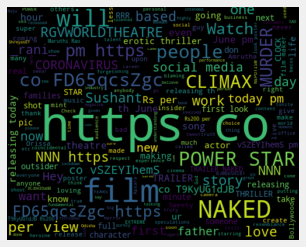

In [9]:
#Plotting the word cloud
allWords = ' '.join( [twts for twts in df['tweets']])
wordcloud = WordCloud(width = 500, height = 400, random_state = 110).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [10]:
#Creating a function for comparing positive and negative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['Analysys'] = df['Polarity'].apply(getAnalysis)
df

,tweets,Subjectivity,Polarity,Analysys
0,Yes please listen to him please! https://t.co/...,0.000000,0.00,Neutral
1,POWER STAR Saab https://t.co/xcnCW1gic8,0.000000,0.00,Neutral
2,Hey HappyBirthdayManisharma Here is the first ...,0.333333,0.25,Positive
3,A POWERomantic poster from POWER STAR https://...,0.000000,0.00,Neutral
4,The highly innovative poster designs of POWER ...,0.950000,0.60,Positive
...,...,...,...,...
195,https://t.co/ioYYJUrGhg,0.000000,0.00,Neutral
196,Me and waiting for R J ⁦⁩ to grill us till CL...,0.000000,0.00,Neutral
197,https://t.co/moQmIck53X,0.000000,0.00,Neutral
198,https://t.co/wNl3WWurDb,0.000000,0.00,Neutral


In [11]:
#printing the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysys'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['tweets'][i])
    print()
    j = j+1

1) Hey HappyBirthdayManisharma Here is the first song ever Mani Sharma did in his career and also the first song I ever shot with Urmila 
https://t.co/2fLwTpdnD9

2) The highly innovative poster designs of POWER STAR are designed by the highly talented ⁦⁦⁩ https://t.co/KGym67AKPX

3) This is just about one of the most fantastic cinematographic frames I created in my entire career and I am super proud NAKED https://t.co/CgjifMcssx

4) I also love those who love animals 😍 https://t.co/yAZuU8Y9gv

5) I love people who love farming 😍😍😍 https://t.co/Vq0Z3ZXnm7

6) Lovely Brothers in POWER STAR https://t.co/T6oCBqcBLf

7) The actor playing the main character in POWER STAR is more POWERful than any STAR I saw https://t.co/RuGlr7IkZJ

8) Here is the first look poster of POWER STAR film soon to release in RGVWORLDTHEATRE JaiPowerStar https://t.co/YMbqXyRu2E

9) First look of POWER STAR releasing in just 12 and half minutes at 11.37 am https://t.co/9pEpTmlPwA

10) POWER STAR first look poster wi

In [12]:
#printing the Negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysys'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tweets'][i])
    print()
    j = j+1

1) There is unnecessary controversy being raised on POWER STAR by malicious people ..I want to state that this film is not going to show anybody in poor light and I swear this on Lord Balaji🙏

2) An angry heated moment between an actor and a director in POWER STAR https://t.co/DxEfIWUAT5

3) Kindly do no believe in media speculations with regard to resemblances in the film POWER STAR ..it is just destiny that some of them look like some of them coincidentally https://t.co/BxJhLFUejT

4) Here are a few photos from the film POWER STAR ..Resemblance to any person is not at all intended https://t.co/EmnHpJeqAA

5) Never even thought of Odisha as a talent pool for film industry..But going by _rani_ coming from there , both the rest of the country and Odisha itself should seriously look at Odisha https://t.co/gGfUwiPwfU

6) Hey have a little doubt ..Who shot this pic at 12.59 in the night https://t.co/E06esc86su

7) Hey the link given in earlier tweet of _rani_ ‘s pics shot by  is wrong ..He

In [13]:
#printing the Neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysys'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['tweets'][i])
    print()
    j = j+1

1) Yes please listen to him please! https://t.co/Qnb4TjrlpR

2) POWER STAR Saab https://t.co/xcnCW1gic8

3) A POWERomantic poster from POWER STAR https://t.co/PS9IyGfpOK

4) My POWER STAR drinks tea and reads books https://t.co/k8Fdli5xv7

5) Putting the tea glass in the logo of POWER STAR is because the hero drinks tea often and it’s not for any political reasons ..In SHIVA logo I used Cycle chain because hero often hits with it ..THAT’S IT! https://t.co/513oHQbPtv

6) A RUSSIAN woman wrapped in an INDIAN saree with the ARGENTANIAN legend CHE GUEVERA hung on the wall while reading the FRENCH origin book of PAPILLON .....The lead character in the film is truly a GLOBAL POWERSTAR💪💪💪 https://t.co/7hQkDHgl3k

7) Two brothers in a moment from my film POWER STAR https://t.co/Q66pktqCah

8) NAKED is still NAKEDing 😍⁦⁩ ⁦⁩ https://t.co/Rt8DBJt2MY

9) Directing _rani_ in THRILLER https://t.co/HjaK67tLqL

10) Oh ! https://t.co/AKyyQmGDvk

11) WOWWW 10,000 tweet followers in 7 hours ..That must b

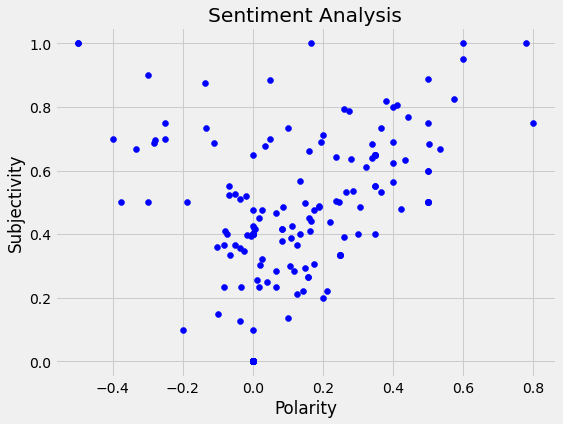

In [14]:
#plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
#Getting the percentage of tweets
ptweets = df[df.Analysys == 'Positive']
ptweets = ptweets['tweets']
ptweets1 = df[df.Analysys == 'Negative']
ptweets1 = ptweets1['tweets']
ptweets2 = df[df.Analysys == 'Neutral']
ptweets2 = ptweets2['tweets']

print('Positive tweets percentage is:', round ((ptweets.shape[0] / df.shape[0])*100, 1))
print('Negative tweets percentage is:', round ((ptweets1.shape[0] / df.shape[0])*100, 1))
print('Neutral tweets percentage is:', round ((ptweets2.shape[0] / df.shape[0])*100, 1))

Positive tweets percentage is: 51.5
Negative tweets percentage is: 17.5
Neutral tweets percentage is: 31.0


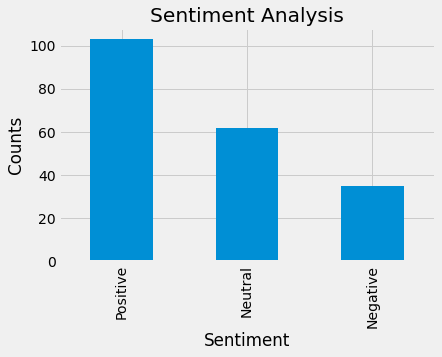

In [16]:
#Plotting the values 
df['Analysys'].value_counts()

#plotting and visualizing the data counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysys'].value_counts().plot(kind = 'bar')
plt.show()